In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Collapsing Categories
if you want to collapse insignificant categories into 'other' category

## 1.1 When there is only one column in the datarame
### use a 'mask' to change the value of the categories
(Even when there are more than one columns in the dataframe, as long as you do not need the other columns for this part of data analysis, you can just choose one column and make it a new dataframe whilst leave the original dataframe unchanged)

In [65]:
election_data = pd.read_csv('election_data.csv')
election_data

,Vote
0,Liliana
1,John
2,William
3,Emilie
4,Pattie
...,...
2394,John
2395,John
2396,John
2397,John


In [22]:
votes = election_data.Vote.value_counts()
votes[votes < 100].index

Index(['Pattie', 'Neil', 'Bob', 'Demi', 'David', 'Hester'], dtype='object')

In [26]:
mask = election_data.isin(votes[votes<100].index)
mask

,Vote
0,False
1,False
2,False
3,False
4,True
...,...
2394,False
2395,False
2396,False
2397,False


In [78]:
election_data[mask] = 'other'
votes_new = election_data.Vote.value_counts()
election_data.Vote.value_counts().tolist()

[1007, 959, 237, 181, 15]

In [71]:
vote_category = votes_new.index
vote_counts = votes_new.values
vote_counts

array([1007,  959,  237,  181,   15], dtype=int64)

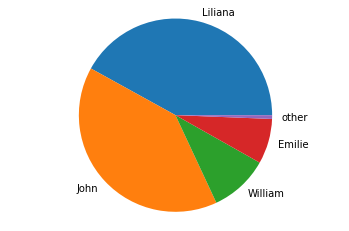

In [72]:
plt.pie(vote_counts, labels = vote_category)
plt.axis('Equal')
plt.show()

### Tips: Extract values in Pandas value_counts()

In [ ]:
#https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts

values = df.column.value_counts().index.tolist() #a list, ['Liliana', 'John', 'William', 'Emilie', 'other']
or values = df.column.value_counts().keys().tolist() #a list, ['Liliana', 'John', 'William', 'Emilie', 'other']
counts = df.column.value_counts().tolist() #a list, [1007, 959, 237, 181, 15]

'''For plotting charts, you do not really need a list, arrays can do just fine.'''
values = df.column.value_counts().index #Index(['Pattie', 'Neil', 'Bob', 'Demi', 'David', 'Hester'], dtype='object')
counts = df.column.value_counts().values #array([1007,  959,  237,  181,   15], dtype=int64)


## 1.2 When there is more than one column in the dateframe
### use df.loc[condition_code, column_to_change] = 'result' to change the value of the categories
(I do not know how to use 'mask' when there is more than one column in the dateframe without ending up changing values in the whole row into 'other')

In [79]:
expense_overview = pd.read_csv('Expenses.csv')
expense_overview
#in the dataframe, we need both 'Expense' and 'Proportion', therefore, I cannot just choose one column from it.

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03
5,Supples,0.01
6,Food,0.01


In [80]:
expense_overview.loc[expense_overview.Proportion < 0.05, 'Expense'] = 'other'
#use df.loc[condition_code, column_to_change] = result
expense_overview

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,other,0.03
4,other,0.03
5,other,0.01
6,other,0.01


### Using .groupby(column, as_index = False) to make your life eaiser!

In [81]:
#now we need to put all the 'other' expenses into one row, using .groupby()
expense_overview_new = expense_overview.groupby('Expense', as_index = False).sum()
expense_overview_new
#specifying (as_index = False) when using groupby makes it waaaaay easier to select columns later on for data visulisation!

,Expense,Proportion
0,Advertising,0.15
1,Office Rent,0.15
2,Salaries,0.62
3,other,0.08


In [82]:
#compare to the result when do not specify as_index=False
expense_overview_cf = expense_overview.groupby('Expense').sum()
expense_overview_cf
#Expense is used as index, and it is on a different level to Proportion! What a nightmare!

,Proportion
Expense,
Advertising,0.15
Office Rent,0.15
Salaries,0.62
other,0.08


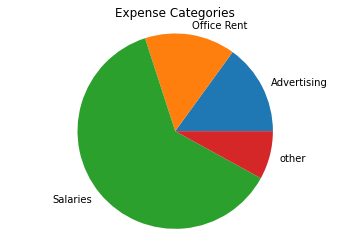

In [83]:
expense_categories = expense_overview_new.Expense
proportions = expense_overview_new.Proportion
plt.pie(proportions, labels = expense_categories)
plt.axis('Equal')
plt.title('Expense Categories')
plt.show()

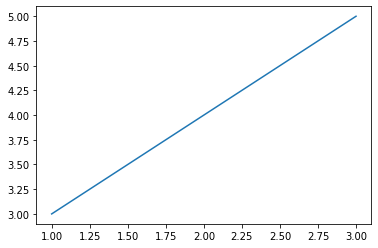

In [84]:
x = [1,2,3]
y = [3,4,5]
plt.plot(x,y)
plt.show()

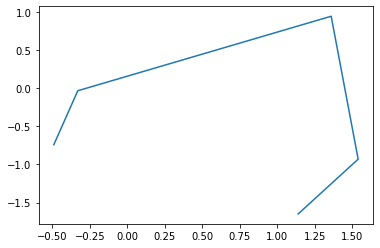

In [88]:
x = [-0.49, -0.33, 1.36, 1.54, 1.14]
y = [-0.74,-0.03,0.95,-0.93, -1.65]
plt.plot(x,y)
plt.show()

In [96]:
a = np.array([[1,4],[3,1], [2, 5]])
a[a[:,0].argsort()]

array([[1, 4],
       [2, 5],
       [3, 1]])